<a href="https://colab.research.google.com/github/Lalit767/Expedia_Case_Study/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

R² Score: 0.9920
RMSE: 512.44


<ipython-input-6-1426b3cc7fda>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=top20_sorted, palette="coolwarm")


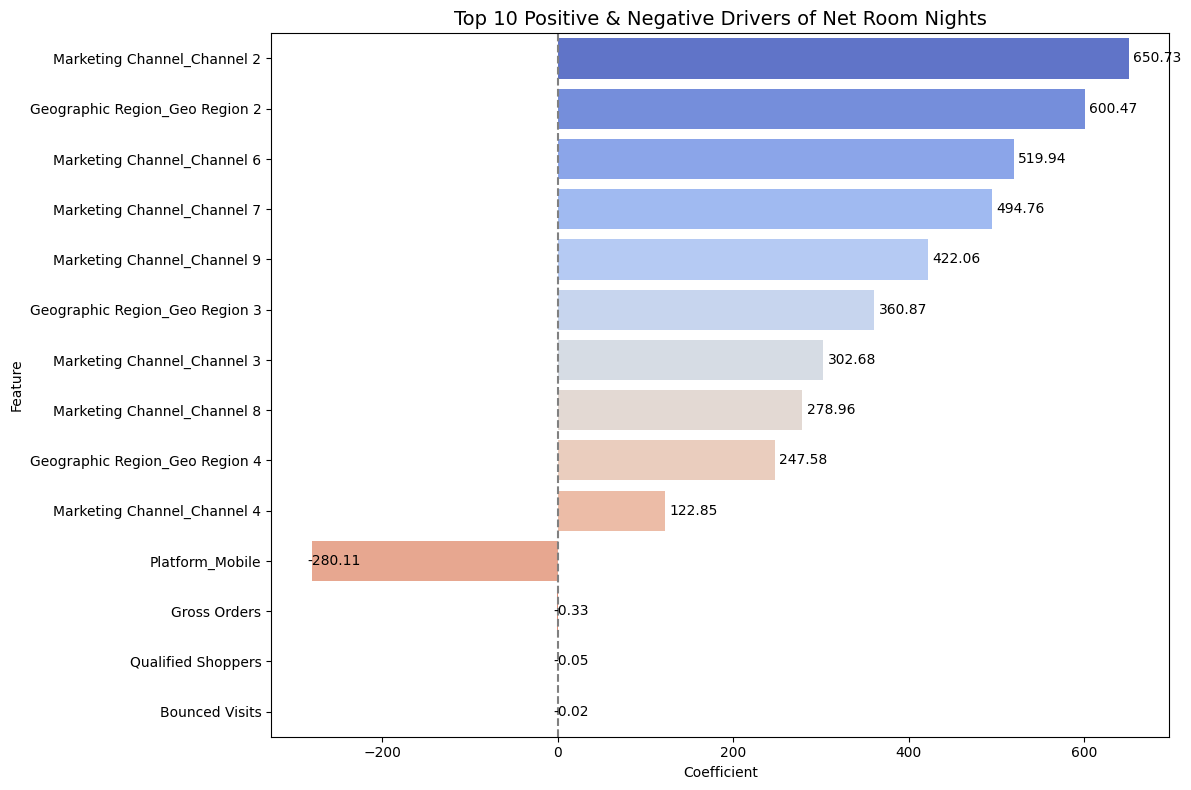

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Load data
df = pd.read_csv("/content/sample_data/HCOM_Analytics_Insights_Case_Study_Dataset.csv")

# Define target and drop unnecessary columns
X = df.drop(columns=["Net Room Nights", "Date"])
y = df["Net Room Nights"]

# Identify categorical and numerical columns
categorical_cols = ["Geographic Region", "Platform", "Marketing Channel"]
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessing for categorical features
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols)
], remainder='passthrough')

# Create pipeline with linear regression
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Model predictions and performance
y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

# Get feature names and coefficients
encoded_cats = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(categorical_cols)
all_features = list(encoded_cats) + numerical_cols
coefficients = pipeline.named_steps['regressor'].coef_

# Create DataFrame for feature importance
coef_df = pd.DataFrame({
    "Feature": all_features,
    "Coefficient": coefficients
})

# Split into positive and negative coefficients
positive_df = coef_df[coef_df["Coefficient"] > 0].sort_values(by="Coefficient", ascending=False).head(10)
negative_df = coef_df[coef_df["Coefficient"] < 0].sort_values(by="Coefficient", ascending=True).head(10)
top20_sorted = pd.concat([positive_df, negative_df])

# Plot with value labels
plt.figure(figsize=(12, 8))
sns.barplot(x="Coefficient", y="Feature", data=top20_sorted, palette="coolwarm")
plt.title("Top 10 Positive & Negative Drivers of Net Room Nights", fontsize=14)
plt.axvline(0, color='gray', linestyle='--')

# Add coefficient value labels
for i, (coef, feature) in enumerate(zip(top20_sorted["Coefficient"], top20_sorted["Feature"])):
    plt.text(coef + np.sign(coef)*5, i, f"{coef:.2f}", va='center')

plt.tight_layout()
plt.show()
